In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sas
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [3]:
data=pd.read_csv('gld_price_data.csv')

In [4]:
data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [5]:
data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303296
75%,2073.010070,132.840004,37.827501,22.882499,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [6]:
data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [7]:
correlation=data.corr()

<AxesSubplot:>

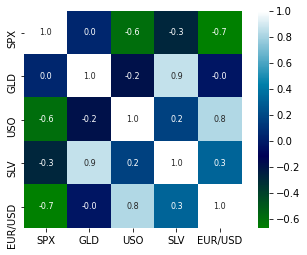

In [11]:
plt.figure()
sas.heatmap(correlation,cbar=True,square=True,fmt='0.1f',annot=True,annot_kws={'size':8},cmap='ocean')

D:\AnacondaCompiler\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

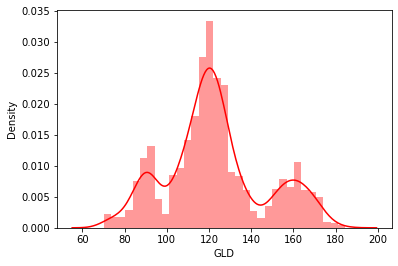

In [12]:
sas.distplot(data['GLD'],color='red')

In [13]:
#Data spliting

In [15]:
X=data.drop(['Date','GLD'],axis=1)
Y=data.GLD

In [16]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [19]:
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape,sep='\t')

(1832, 4)	(458, 4)	(1832,)	(458,)


In [17]:
model=RandomForestRegressor(n_estimators=100)

In [20]:
model.fit(X_train,Y_train)

RandomForestRegressor()

Mean absolute error:  0.4847114247325309
R square error:  0.9985163190655693
Mean absolute error:  1.3318344451746682
R square error:  0.9891795310730509


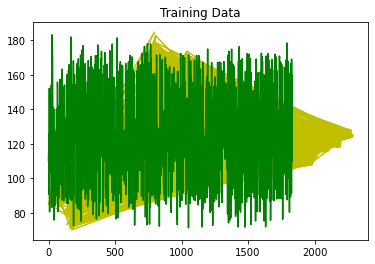

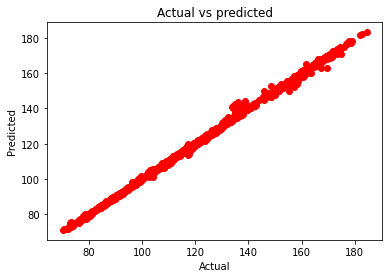

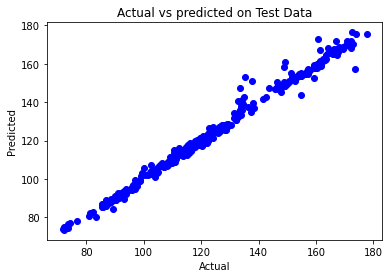

In [22]:
predictedTrain=model.predict(X_train)

error1=metrics.mean_absolute_error(Y_train,predictedTrain)
error2=metrics.r2_score(Y_train,predictedTrain)

print("Mean absolute error: ",error1)
print("R square error: ",error2)

predictedTest=model.predict(X_test)

error3=metrics.mean_absolute_error(Y_test,predictedTest)
error4=metrics.r2_score(Y_test,predictedTest)

print("Mean absolute error: ",error3)
print("R square error: ",error4)

plt.plot(Y_train,color='y',label='Actual Price')
plt.plot(predictedTrain,color='g',label='Predicted Price')
plt.title('Training Data')
plt.show()

plt.scatter(Y_train,predictedTrain,color='r')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs predicted')
plt.show()

plt.scatter(Y_test,predictedTest,color='b')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs predicted on Test Data')
plt.show()

#Since the above two graph has almost straight line which means our model is performing very well...